In [18]:
import pandas as pd
import seaborn as sns


df = pd.read_csv("logs.csv", sep=";")
df.head()

,timestamp,prob_pause,prob_plank,prob_pull-up,prob_push-up,prob_squat
0,17:54:33.1764780873,1.000000,0,1.124227e-11,8.288114e-10,9.179974e-09
1,17:54:33.1764780873,1.000000,0,5.828770e-11,7.320929e-09,4.344257e-08
2,17:54:34.1764780874,1.000000,0,3.296344e-10,1.489167e-09,7.491394e-08
3,17:54:35.1764780875,0.999999,0,7.647039e-10,3.416885e-09,5.032060e-07
4,17:54:35.1764780875,1.000000,0,1.034849e-09,2.592309e-08,1.268030e-07


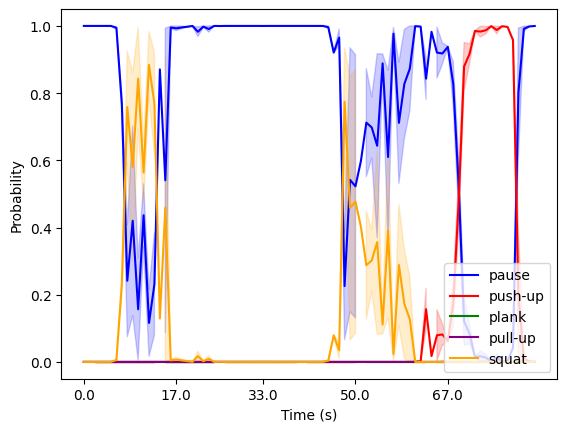

In [20]:
import matplotlib.pyplot as plt

# Convert timestamp to seconds, normalizing by the first timestamp
def to_seconds(ts):
    # Handles both "HH:MM:SS.sss..." and "HH:MM:SS.ssssss" formats
    if "." in ts:
        t, ms = ts.split(".", 1)
        ms = "0." + ms
    else:
        t = ts
        ms = "0"
    h, m, s = map(int, t.split(":"))
    base = h * 3600 + m * 60 + s
    return base + float(ms)

df["timestamp_sec"] = df["timestamp"].apply(to_seconds)
df["timestamp_sec"] -= df["timestamp_sec"].iloc[0]  # normalize to 0

sns.lineplot(x="timestamp_sec", y="prob_pause", data=df, label="pause", color="blue")
sns.lineplot(x="timestamp_sec", y="prob_push-up", data=df, label="push-up", color="red")
sns.lineplot(x="timestamp_sec", y="prob_plank", data=df, label="plank", color="green")
sns.lineplot(x="timestamp_sec", y="prob_pull-up", data=df, label="pull-up", color="purple")
sns.lineplot(x="timestamp_sec", y="prob_squat", data=df, label="squat", color="orange")

plt.xlabel("Time (s)")
plt.ylabel("Probability")
plt.xticks(
    ticks=df["timestamp_sec"][::max(1, len(df)//5)],
    labels=[f"{s:.1f}" for s in df["timestamp_sec"][::max(1, len(df)//5)]],
)
plt.legend(loc='lower right')